Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
Found 1200 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Epoch 1/20
240/240 [==============================] - 238s 967ms/step - loss: 0.6897 - accuracy: 0.6567 - val_loss: 0.4472 - val_accuracy: 0.8000
Epoch 2/20
240/240 [==============================] - 153s 637ms/step - loss: 0.5837 - accuracy: 0.7233 - val_loss: 0.4481 - val_accuracy: 0.8317
Epoch 3/20
240/240 [==============================] - 161s 671ms/step - loss: 0.5615 - accuracy: 0.7508 - val_loss: 0.4829 - val_accuracy: 0.7600
Epoch 4/20
240/240 [==============================] - 160s 668ms/step - loss: 0.5631 - accuracy: 0.7508 - val_loss: 0.4274 - val_accuracy: 0.8000
Epoch 5/20
240/240 [==============================] - 155s 646ms/step - loss: 0.5039 - accuracy: 0.7692 - val_loss: 0.4236 - val_accuracy: 0.8017
Epoch 6/20
240/240 [==============================] - 150s 623ms/step - 

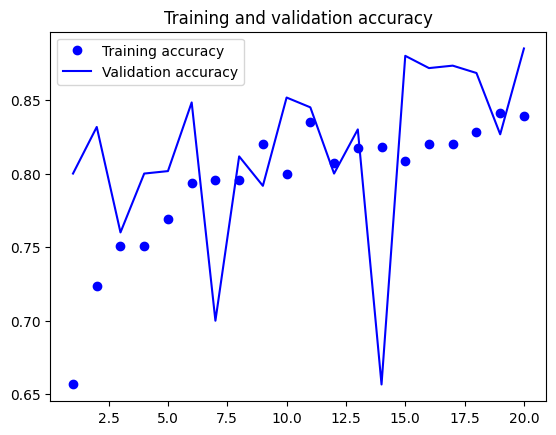

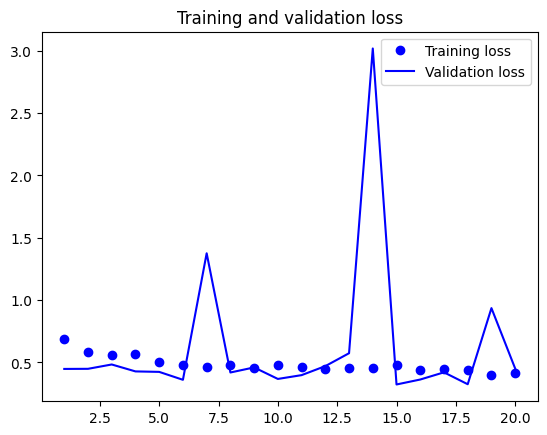

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from google.colab import drive
drive.mount('/gdrive')

IMG_SIZE = 192
BATCH_SIZE = 5
NUM_CLASSES = 2  # Two classes: with_mask, without_mask

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    '/gdrive/MyDrive/mask-detection/images/train',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=['with_mask', 'without_mask']
)

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    '/gdrive/MyDrive/mask-detection/images/val',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=['with_mask', 'without_mask']
)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=20,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE
)

loss, accuracy = model.evaluate(val_generator, steps=50)
print("Validation accuracy:", accuracy)

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [2]:
model.save('/gdrive/MyDrive/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [6]:
# Install TensorFlow.js converter
!pip install tensorflowjs

import tensorflow as tf
from tensorflow.keras.models import load_model
import tensorflowjs as tfjs

# Load the Keras model
keras_model = load_model('/gdrive/MyDrive/model.h5')

# Convert the Keras model to TensorFlow.js format
tfjs.converters.save_keras_model(keras_model, '/gdrive/MyDrive/tfjs_model')


  Using cached tensorflowjs-4.17.0-py3-none-any.whl (89 kB)
  Using cached tensorflow_decision_forests-1.8.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (15.3 MB)
